In [1]:
import numpy as np

In [2]:
train_audio = np.load('../Dataset/Mix/Train/sorted_audio.npy')
train_audio_label = np.load('../Dataset/Mix/Train/sorted_audio_label.npy')
train_audio_identity = np.load('../Dataset/Mix/Train/sorted_audio_identity.npy')
train_face = np.load('../Dataset/Mix/Train/sorted_face.npy')
train_face_label = np.load('../Dataset/Mix/Train/sorted_face_label.npy')
train_face_identity = np.load('../Dataset/Mix/Train/sorted_face_identity.npy')

In [3]:
validation_audio = np.load('../Dataset/Mix/Validation/sorted_audio.npy')
validation_audio_label = np.load('../Dataset/Mix/Validation/sorted_audio_label.npy')
validation_audio_identity = np.load('../Dataset/Mix/Validation/sorted_audio_identity.npy')
validation_face = np.load('../Dataset/Mix/Validation/sorted_face.npy')
validation_face_label = np.load('../Dataset/Mix/Validation/sorted_face_label.npy')
validation_face_identity = np.load('../Dataset/Mix/Validation/sorted_face_identity.npy')

In [4]:
test_audio = np.load('../Dataset/Mix/Test/sorted_audio.npy')
test_audio_label = np.load('../Dataset/Mix/Test/sorted_audio_label.npy')
test_audio_identity = np.load('../Dataset/Mix/Test/sorted_audio_identity.npy')
test_face = np.load('../Dataset/Mix/Test/sorted_face.npy')
test_face_label = np.load('../Dataset/Mix/Test/sorted_face_label.npy')
test_face_identity = np.load('../Dataset/Mix/Test/sorted_face_identity.npy')

In [5]:
train_audio_2d = train_audio.reshape(train_audio.shape[0], -1)
validation_audio_2d = validation_audio.reshape(validation_audio.shape[0], -1)
test_audio_2d = test_audio.reshape(test_audio.shape[0], -1)

In [6]:
print(train_audio_2d.shape)
print(validation_audio_2d.shape)
print(test_audio_2d.shape)

(120, 520)
(48, 520)
(232, 520)


In [7]:
train_combined_features = np.concatenate((train_audio_2d, train_face), axis=1)
validation_combined_features = np.concatenate((validation_audio_2d, validation_face), axis=1)
test_combined_features = np.concatenate((test_audio_2d, test_face), axis=1)

In [8]:
print(train_combined_features.shape)
print(validation_combined_features.shape)
print(test_combined_features.shape)

(120, 1544)
(48, 1544)
(232, 1544)


In [9]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

[0]	validation_0-logloss:0.46440	validation_1-logloss:0.57338
[1]	validation_0-logloss:0.35705	validation_1-logloss:0.55825
[2]	validation_0-logloss:0.28115	validation_1-logloss:0.51925
[3]	validation_0-logloss:0.22531	validation_1-logloss:0.51236
[4]	validation_0-logloss:0.18422	validation_1-logloss:0.52068
[5]	validation_0-logloss:0.15151	validation_1-logloss:0.53001
[6]	validation_0-logloss:0.12891	validation_1-logloss:0.53039
[7]	validation_0-logloss:0.10920	validation_1-logloss:0.53823
[8]	validation_0-logloss:0.09327	validation_1-logloss:0.55396
[9]	validation_0-logloss:0.08299	validation_1-logloss:0.54921
[10]	validation_0-logloss:0.07339	validation_1-logloss:0.55737
[11]	validation_0-logloss:0.06535	validation_1-logloss:0.55381


c:\Users\andre\anaconda3\envs\Python\lib\site-packages\xgboost\core.py:158: UserWarning: [21:11:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[12]	validation_0-logloss:0.05960	validation_1-logloss:0.55049
[13]	validation_0-logloss:0.05349	validation_1-logloss:0.55109
[14]	validation_0-logloss:0.04855	validation_1-logloss:0.54762
[15]	validation_0-logloss:0.04549	validation_1-logloss:0.54864
[16]	validation_0-logloss:0.04247	validation_1-logloss:0.55434
[17]	validation_0-logloss:0.03953	validation_1-logloss:0.56940
[18]	validation_0-logloss:0.03692	validation_1-logloss:0.57658
[19]	validation_0-logloss:0.03495	validation_1-logloss:0.59458
[20]	validation_0-logloss:0.03320	validation_1-logloss:0.59223
[21]	validation_0-logloss:0.03181	validation_1-logloss:0.58105
[22]	validation_0-logloss:0.03104	validation_1-logloss:0.57903
[23]	validation_0-logloss:0.03030	validation_1-logloss:0.58184
[24]	validation_0-logloss:0.02890	validation_1-logloss:0.58706
[25]	validation_0-logloss:0.02823	validation_1-logloss:0.58092
[26]	validation_0-logloss:0.02758	validation_1-logloss:0.58412
[27]	validation_0-logloss:0.02699	validation_1-logloss:

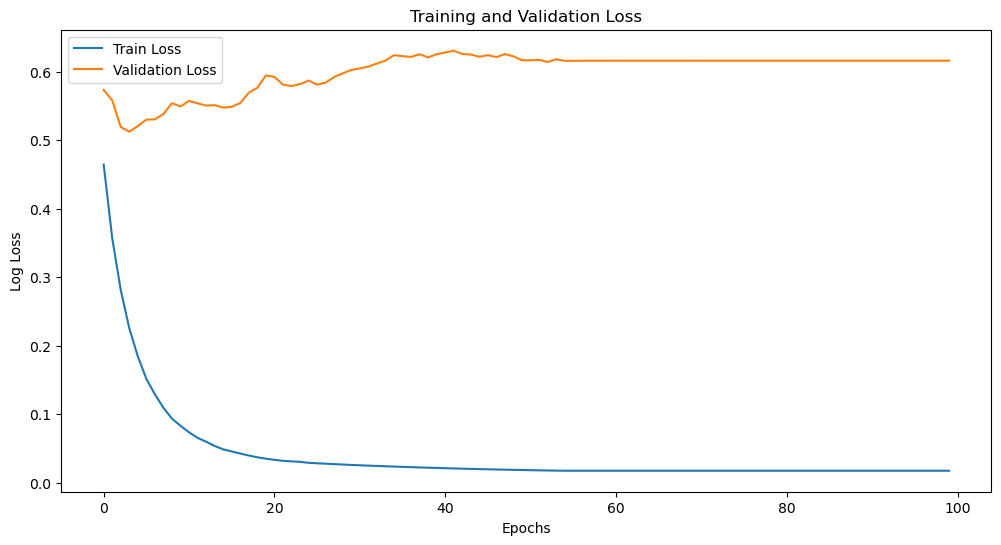

Accuracy: 79.31%
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       136
           1       0.79      0.68      0.73        96

    accuracy                           0.79       232
   macro avg       0.79      0.78      0.78       232
weighted avg       0.79      0.79      0.79       232



In [11]:
# Train an XGB classifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
eval_set  = [(train_combined_features, train_audio_label), (validation_combined_features, validation_audio_label)]
xgb_classifier.fit(train_combined_features, train_audio_label, eval_set=eval_set, verbose=True)

evals_result = xgb_classifier.evals_result()
epochs = len(evals_result['validation_0']['logloss'])
x_axis = range(epochs)

plt.figure(figsize=(12, 6))
plt.plot(x_axis, evals_result['validation_0']['logloss'], label='Train Loss')
plt.plot(x_axis, evals_result['validation_1']['logloss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Test the SVM classifier on the test set
xgb_predictions = xgb_classifier.predict(test_combined_features)

# Evaluate the classifier
accuracy = accuracy_score(test_audio_label, xgb_predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print detailed classification report
print(classification_report(test_audio_label, xgb_predictions))

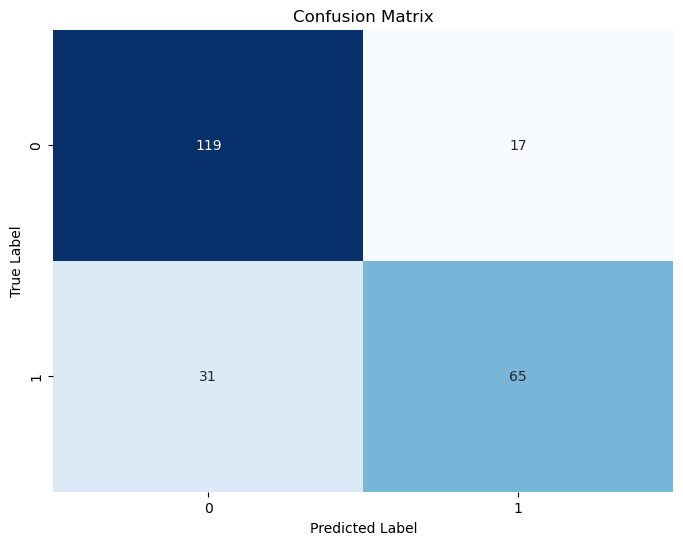

In [12]:
# Plot confusion matrix
conf_matrix = confusion_matrix(test_audio_label, xgb_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [13]:
param_grid = {
    'max_depth': [3, 5, 7],  # Depth of the tree
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'n_estimators': [50, 100, 200],  # Number of trees
    'subsample': [0.5, 0.7, 1.0],  # Fraction of samples used for fitting
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, 
                           scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(validation_combined_features, validation_audio_label)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the classifier with the best parameters
best_lfcc_xgb_classifier = grid_search.best_estimator_

# Test the classifier on the evaluation set
xgb_predictions = best_lfcc_xgb_classifier.predict(test_combined_features)

# Evaluate the classifier
accuracy = accuracy_score(test_audio_label, xgb_predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print detailed classification report
print(classification_report(test_audio_label, xgb_predictions))

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Accuracy: 68.10%
              precision    recall  f1-score   support

           0       0.70      0.80      0.75       136
           1       0.64      0.51      0.57        96

    accuracy                           0.68       232
   macro avg       0.67      0.66      0.66       232
weighted avg       0.68      0.68      0.67       232



c:\Users\andre\anaconda3\envs\Python\lib\site-packages\xgboost\core.py:158: UserWarning: [21:11:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


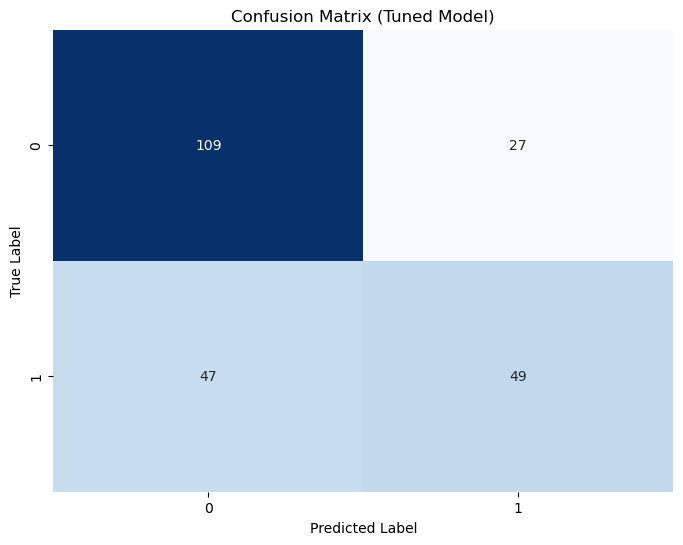

In [16]:
# Plot confusion matrix for the tuned model
conf_matrix_tuned = confusion_matrix(test_audio_label, xgb_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tuned, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Tuned Model)')
plt.show()